# Digital Epidemiology Final Project

**LEONARDO LAVAGNA 1650170**

**GROUP 14**

## PART 1 . Simulation of an epidemic on a given network using an SIR model

### Set up

In [ ]:
#!pip install EoN

In [1]:
# LIBRARIES

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import EoN
import random
import numpy as np
import pandas as pd
import auxiliary_functions as AF

In [2]:
# GLOBAL PARAMETERS

#transmission rates
beta  = 0.005
betas = [10*beta,beta/10]

#recovery rate
gamma = 0.025

#times
t0   = 0
tmax = 100

#r0
r0 = beta/gamma
print("Value of r_0:", r0)

#percentage of initial infected
rho = 0.1

Value of r_0: 0.19999999999999998


### Graph creation

In [3]:
# GRAPH

g = nx.read_edgelist("edges-13.csv",delimiter=',',create_using=nx.Graph(),nodetype=int)

In [ ]:
# CHECK

print(nx.info(g))

In [ ]:
# NODES POSITIONS FOR PLOTTING

spring_pos = nx.spring_layout(g)

In [ ]:
# PLOT

nx.draw_networkx(g,pos=spring_pos,with_labels=False,node_size=5)

### SIR simulation

In [ ]:
# SIMULATION

sim = EoN.Gillespie_SIR(g,tau = beta, gamma = gamma,return_full_data=True)
t, S, I, R = EoN.Gillespie_SIR(g,tau = beta, gamma = gamma,rho = rho)

In [ ]:
# PLOTS AT TIME t0

sim.display(time=t0,pos=spring_pos,node_size=5)
plt.show()

In [ ]:
# PLOTS AT TIME tmax

sim.display(time=tmax,pos=spring_pos,node_size=5)
plt.show()

### SIR dynamics

In [ ]:
# PLOTS OF THE SIR DYNAMICS

fig, ax = plt.subplots()
ax.plot(t, S, label = "S",color="blue")
ax.plot(t, I, label = "I",color="orange")
ax.plot(t, R, label = "R",color="green")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

In [ ]:
# EPIDEMIC SIZE

I.argmax()/g.order()

### Analysis of the final epidemic size as beta changes when gamma is fixed 


In [ ]:
# SIMULATION IN THE CASE r0>1

t1, S1, I1, R1 = EoN.Gillespie_SIR(g,tau = betas[0], gamma = gamma,rho = rho)

In [ ]:
# SIMULATION IN THE CASE r0<1

t2, S2, I2, R2 = EoN.Gillespie_SIR(g,tau = betas[1], gamma = gamma,rho = rho)

In [ ]:
# PLOTS

plt.plot(t1, I1, color='r', label='R_0>1')
plt.plot(t2, I2, color='g', label='R_0<1')
plt.legend()
plt.show()

### Study of the epidemic threshold

**Reference**: Gabriel Fabricius, Alberto Maltz, Exploring the threshold of epidemic spreading for a stochastic SIR model with local and global contacts, Physica A: Statistical Mechanics and its Applications, Volume 540, 2020, 123208, ISSN 0378-4371, https://doi.org/10.1016/j.physa.2019.123208. 

**Online Version of the Reference**: https://www.sciencedirect.com/science/article/pii/S0378437119318035)

In [ ]:
# SIMULATION

sim_thr = EoN.Gillespie_SIR(g, tau=gamma, gamma=gamma, return_full_data=True)
t_thr, S_thr, I_thr, R_thr = EoN.Gillespie_SIR(g, tau=gamma, gamma=gamma, rho=rho)

In [ ]:
# PLOTS AT TIME t0

sim_thr.display(time=t0, pos=spring_pos,node_size=5)
plt.show()

In [ ]:
# PLOTS AT TIME tmax

sim_thr.display(time=tmax, pos=spring_pos,node_size=5)
plt.show()

In [ ]:
# PLOTS OF THE SIR DYNAMICS

fig, ax = plt.subplots()
ax.plot(t_thr, S_thr, label = "S",color="blue")
ax.plot(t_thr, I_thr, label = "I",color="orange")
ax.plot(t_thr, R_thr, label = "R",color="green")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

## SUPPLEMENT TO PART 1 . Equivalence of EoN.Gillespie_SIR and EoN.fast_SIR
**Reference**: https://arxiv.org/pdf/2001.02436.pdf

In [ ]:
# EQUIVALENCE EoN.Gillespie_SIR AND EoN.fast_SIR

t_f, S_f, I_f, R_f = EoN.fast_SIR(g, tau=beta, gamma=gamma, rho=rho)
t_g, S_g, I_g, R_g = EoN.Gillespie_SIR(g, tau=beta, gamma=gamma, rho=rho)

plt.plot(t_f, I_f, label = 'fast_SIR')
plt.plot(t_g, I_g, label = 'Gillespie_SIR')
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

## PART 2 . Generate a random network by randomly rewiring a variable percentage of edges and repeat Part 1

### Graph creation

In [ ]:
# PARAMETERS

#percentage of edges to rewire
p = 0.3

In [ ]:
# EXAMPLE GRAPHS WITH 30% OF EDGES REMOVED

#Copy of g
g_s = g.copy() 

#population size
N_s = g_s.order()

#Sample a percentage p of random edges and nodes
sampled_edges = random.sample(g_s.edges,int(p*N_s))
sampled_nodes = random.sample(g_s.nodes,int(p*N_s))

#rewire a percentage p of random edges
for e in sampled_edges:
    #remove random edge
    g_s.remove_edge(*e)
    #add back the edge
    uv = random.sample(g_s.nodes,2)
    g_s.add_edge(*uv)

#check
print(nx.info(g_s))

In [ ]:
# PLOTS

spring_pos_gs = nx.spring_layout(g_s)
nx.draw_networkx(g_s,pos=spring_pos_gs,with_labels=False,node_size=5)

### Repeat Part 1 with the new graph

In [ ]:
# SIR SIMULATION

t_s, S_s, I_s, R_s = EoN.Gillespie_SIR(g_s, tau=beta, gamma=gamma, rho=rho)

In [ ]:
# PLOTS OF THE SIR DYNAMICS

fig, ax = plt.subplots()
ax.plot(t_s, S_s, label = "S",color="blue")
ax.plot(t_s, I_s, label = "I",color="orange")
ax.plot(t_s, R_s, label = "R",color="green")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

In [ ]:
# EPIDEMIC SIZE

I_s.argmax()/N_s

In [ ]:
# ANALYSIS OF THE FINAL EPIDEMIC SIZE AS BETA CHANGES WHEN GAMMA IS FIXED 

#Simulation when r0>1
t3, S3, I3, R3 = EoN.Gillespie_SIR(g_s,tau = betas[0], gamma = gamma,rho = rho)

#Simulation when r0>1
t4, S4, I4, R4 = EoN.Gillespie_SIR(g_s,tau = betas[1], gamma = gamma,rho = rho)

#plots of the SIR dynamics
plt.plot(t3, I3, color='r', label='R_0>1')
plt.plot(t4, I4, color='g', label='R_0<1')
plt.legend()
plt.show()

#Simulation in the case of epidemic threshold
t5, S5, I5, R5 = EoN.Gillespie_SIR(g_s,tau=gamma, gamma = gamma,rho = rho)

#plots of the SIR dynamics
fig, ax = plt.subplots()
ax.plot(t5, S5, label = "S",color="blue")
ax.plot(t5, I5, label = "I",color="orange")
ax.plot(t5, R5, label = "R",color="green")
plt.title("SIR dynamics in the epidemic threshold case")
plt.legend(loc="best")
plt.show()

## PART 3 . Repeat Part 1 with part of the population immunized


### Initial immunized choosed at random

In [4]:
# SIMULATION WITHOUT IMMUNIZATION

sir=AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="")
sir.run(priority="",frac=0.00)
data=sir.getDataNormalized()

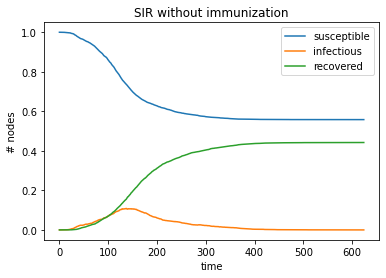

In [5]:
# PLOTS

AF.plot_sir(plt,data, title="SIR without immunization")

In [12]:
# SIMULATION WITH RANDOM IMMUNIZATION

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="")
sir.run(priority="random", frac=0.3)
data_immunization=sir.getDataNormalized()

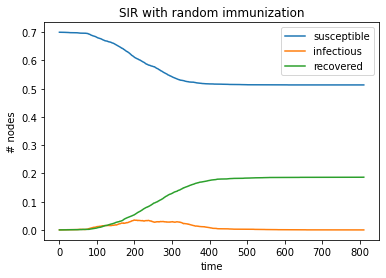

In [13]:
# PLOTS

AF.plot_sir(plt,data_immunization, title="SIR with random immunization")

### Initial immunized choosed following the closeness centrality

In [14]:
# SIMULATION WITH CLOSENESS IMMUNIZATION

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="")
sir.run(priority="degree", frac=0.3)
data_immunization=sir.getDataNormalized()

KeyError: (0, 19)

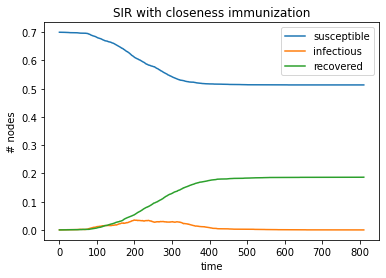

In [15]:
# PLOTS

AF.plot_sir(plt,data_immunization, title="SIR with closeness immunization")

## PART 4. Assign the recovery rate to each individual from a probability distribution and repeat Part 1.

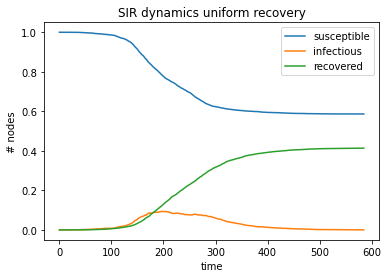

In [20]:
# SIMULATION WITH UNIFORM RECOVERY

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="")
sir.run(priority="", frac=0.00)
data=sir.getDataNormalized()


# PLOTS

AF.plot_sir(plt,data, title="SIR dynamics uniform recovery")

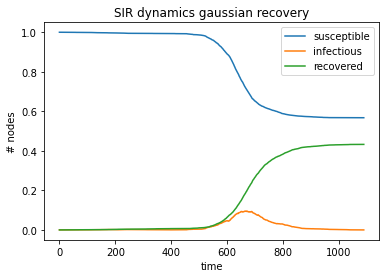

In [26]:
# SIMULATION WITH GAUSSIAN RECOVERY

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="gaussian")
sir.run(priority="", frac=0.00)
data=sir.getDataNormalized()


# PLOTS

AF.plot_sir(plt,data, title="SIR dynamics gaussian recovery")

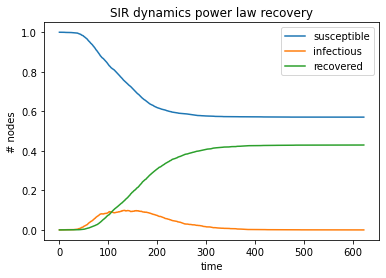

In [28]:
# SIMULATION WITH POWER LAW RECOVERY WITH a=2

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="power")
sir.run(priority="", frac=0.00)
data=sir.getDataNormalized()


# PLOTS

AF.plot_sir(plt,data, title="SIR dynamics power law recovery")